## Say "Hello World"  With Qubiter
This notebook is meant to illustrate how to use Qubiter to simulate ( i.e., 
predict the outcome of) a simple quantum circuit with a few basic gates

> Below, we won't always give the precise definition of each gate. You can find the
precise analytical/numerical definition of all gates implemented by Qubiter in the document entitled `qubiter_rosetta_stone.pdf`  included with the Qubiter distribution

$\newcommand{\bra}[1]{\left\langle{#1}\right|}$
$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$

test: $\bra{\psi}M\ket{\phi}$

First change your working directory to the qubiter directory in your computer, and add its path to the path environment variable.

In [1]:
import os
import sys
print(os.getcwd())
os.chdir('../')
print(os.getcwd())
sys.path.insert(0,os.getcwd())

/home/Notebooks/Quantum/qubiter/qubiter/jupyter-notebooks
/home/Notebooks/Quantum/qubiter/qubiter


In [2]:
from SEO_writer import *
from SEO_simulator import *
from StateVec import *
from SEO_MatrixProduct import *
import numpy as np

Number of qubits is 4.
Note that we use "bit" for both qbits and cbits.

In [3]:
num_bits = 4

Use a trivial circuit embedder that embeds 4 qubits into same 4 qubits.

In [4]:
emb = CktEmbedder(num_bits, num_bits)

Open a writer, tell it where to write to.
We will use zero bit last (ZL) convention, which is the default for SEO_writer.

In [5]:
file_prefix = 'io_folder/hello_world_test'
wr = SEO_writer(file_prefix, emb)

Write Pauli matrices $\sigma_X, \sigma_Y,\sigma_Z$ at position 2.

In [6]:
wr.write_X(2)
wr.write_Y(2)
wr.write_Z(2)

# old way of doing it, still works
# wr.write_one_bit_gate(2, OneBitGates.sigx)
# wr.write_one_bit_gate(2, OneBitGates.sigy)
# wr.write_one_bit_gate(2, OneBitGates.sigz)

Write 1 qubit Hadamard matrix at position 3.

In [7]:
wr.write_H(3)

# old way of doing it, still works
# wr.write_one_bit_gate(3, OneBitGates.had2)

Rotate qubit 2 by pi along directions x, y, z successively.

> Note: We define $Ra(\theta) = exp(i\theta\sigma_a)$ for $a=X,Y,Z$. Others use 
$Ra(\theta) = exp(-i\frac{\theta}{2}\sigma_a)$ instead

> Note: $\theta$ in $Ra(\theta)$ is inserted in radians, but shows 
up in the English File in degrees.

In [8]:
wr.write_Rx(2, np.pi)
wr.write_Ry(2, np.pi)
wr.write_Rz(2, np.pi)

# old way of doing it, still works dir=1,2,3
# wr.write_one_bit_gate(2, OneBitGates.rot_ax,[np.pi, dir])

Rotate qubit 1 along a non-axis direction $\hat{n}$ characterized by a list of 3 angles.
$R(\theta_1, \theta_2, \theta_3) = \exp(i[\theta_1 \sigma_X +\theta_2\sigma_Y+\theta_3\sigma_Z])$

In [9]:
wr.write_Rn(1, [np.pi, np.pi/2, np.pi/3])

Definitions of S and T

$S = diag[1, i] = diag[1, e^{i\frac{\pi}{2}}]$

$T = \sqrt{S}= diag[1, e^{i\frac{\pi}{4}}]$


Write  $S, S^\dagger, T, T^\dagger$ at position=2.

> These operations show up in the English File as `P1PH` and in the 
Picture File as `@P`. That is because $P_1 = n =\ket{1}\bra{1} = diag(0, 1)$ and the operation 
`P1PH` (i.e. $P_1$ Phase) by a phase angle $\theta$ equals the diagonal matrix $diag(1, e^{i\theta})$ 

In [10]:
wr.write_S(2)
wr.write_S(2, herm=True)
wr.write_T(2)
wr.write_T(2, herm=True)

Write $CNOT = sigx(target\_pos)^{n(control\_pos)}$ with control_pos=3 and target_pos=1

In [11]:
wr.write_cnot(3, 1)

# old way of doing it, still works
# control_pos = 3
# target_pos = 1
# trols = Controls.new_knob(num_bits, control_pos, kind=True)
# wr.write_controlled_one_bit_gate(
#     target_pos, trols, OneBitGates.sigx)

At any point in the circuit, you can use a PRINT statement. This will print
on the console, immediately after you create
an object of the class SEO_simulator, a description of the state vector at that point in the circuit.
Various styles of description are pre-canned for your convenience, or
you can write your own. See use_PRINT() method of SEO_simulator class.
Let's use a PRINT statement now in the pre-canned style "ALL".

In [12]:
wr.write_PRINT("ALL")

Swap qubits 1 and 3

In [13]:
wr.write_bit_swap(1, 3)

 Recall that
$P_1 = n = \ket{1}\bra{1}=diag(0, 1)$ and a P1 phase (P1PH) by $\theta$ is $diag(1, e^{i\theta})$. Write a singly controlled P1PH with control=c=3, target=t=1 and rads = pi/3.
This gate equals $e^{i*rads*n(t) n(c)}$. 

In [14]:
wr.write_c_P1PH(3, 1, rads=np.pi/3)

If rads=pi, c_P1PH equals  $(-1)^{n(t)n(c)} = \sigma_Z(t)^{n(c)}$,
which is commonly called a controlled Z and denoted by Cz. Write a Cz with c=3 and t=1.

In [15]:
wr.write_c_P1PH(3, 1)  # rads=np.pi is default

Close English and Picture files

In [16]:
wr.close_files()

Look in files

* <a href="../io_folder/hello_world_test_4_eng.txt">../io_folder/hello_world_test_4_eng.txt</a>
* <a href="../io_folder/hello_world_test_4_ZLpic.txt">../io_folder/hello_world_test_4_ZLpic.txt</a>

to see the quantum circuit that was generated

Once the English and Picture files are generated, you can ask the writer object wr to print them for you on screen

In [17]:
wr.print_eng_file()

SIGX	AT	2
SIGY	AT	2
SIGZ	AT	2
HAD2	AT	3
ROTX	180.0	AT	2
ROTY	180.0	AT	2
ROTZ	180.0	AT	2
ROTN	180.0	90.0	59.99999999999999	AT	1
P1PH	90.0	AT	2
P1PH	-90.0	AT	2
P1PH	45.0	AT	2
P1PH	-45.0	AT	2
SIGX	AT	1	IF	3T
PRINT	ALL
SWAP	3	1
P1PH	59.99999999999999	AT	1	IF	3T
P1PH	180.0	AT	1	IF	3T



In [18]:
wr.print_pic_file()

|   X   |   |   
|   Y   |   |   
|   Z   |   |   
H   |   |   |   
|   Rx  |   |   
|   Ry  |   |   
|   Rz  |   |   
|   |   R   |   
|   @P  |   |   
|   @P  |   |   
|   @P  |   |   
|   @P  |   |   
@---+---X   |   
PRINT	ALL
<---+--->   |   
@---+---@P  |   
@---+---@P  |   



You can generate a log file with an inventory of the English file by creating
an object of the SEO_reader class with the flag `write_log` set to True

In [19]:
rdr = SEO_reader(file_prefix, num_bits, write_log=True)

The following file was just created

* <a href="../io_folder/hello_world_test_4_log.txt">../io_folder/hello_world_test_4_log.txt</a>

Once the log file is generated, you can ask the reader object rdr to print it for you on screen

In [20]:
rdr.print_log_file()

Number of lines in file = 17
Number of Elem. Ops = 16
Number of CNOTS (SIGX with single control) = 1
List of distinct variable numbers encountered (length=0)=
[]
List of distinct function names encountered (length=0)=
[]



Occasionally, especially for debugging purposes, you might want to display the 
product of a SEO (sequence of elementary operations, sequence of gates) as a 2^num_bits dimensional
unitary matrix. This can be done with the class SEO_MatrixProduct. Simply
creating an object of this class multiplies the SEO and stores the result
in its attribute `self.prod_arr`. Next we print that array for our example

In [21]:
mp = SEO_MatrixProduct(file_prefix, num_bits)
print('product array=')
print(np.array_str(mp.prod_arr, 
                   precision=2, suppress_small=True))

product array=
[[ 0.1 -0.61j  0.  +0.j    0.3 -0.15j  0.  +0.j   -0.  +0.j    0.  +0.j
  -0.  -0.j    0.  +0.j    0.1 -0.61j  0.  +0.j    0.3 -0.15j  0.  +0.j
  -0.  +0.j    0.  +0.j   -0.  -0.j    0.  +0.j  ]
 [ 0.  +0.j    0.1 -0.61j  0.  +0.j    0.3 -0.15j  0.  +0.j   -0.  +0.j
   0.  +0.j   -0.  -0.j    0.  +0.j    0.1 -0.61j  0.  +0.j    0.3 -0.15j
   0.  +0.j   -0.  +0.j    0.  +0.j   -0.  -0.j  ]
 [ 0.3 +0.15j  0.  +0.j   -0.1 -0.61j  0.  +0.j   -0.  -0.j    0.  +0.j
  -0.  +0.j    0.  +0.j   -0.3 -0.15j  0.  +0.j    0.1 +0.61j  0.  +0.j
   0.  +0.j    0.  +0.j    0.  -0.j    0.  +0.j  ]
 [ 0.  +0.j    0.3 +0.15j  0.  +0.j   -0.1 -0.61j  0.  +0.j   -0.  -0.j
   0.  +0.j   -0.  +0.j    0.  +0.j   -0.3 -0.15j  0.  +0.j    0.1 +0.61j
   0.  +0.j    0.  +0.j    0.  +0.j    0.  -0.j  ]
 [-0.  -0.j    0.  +0.j    0.  -0.j    0.  +0.j    0.1 -0.61j  0.  +0.j
   0.3 -0.15j  0.  +0.j   -0.  -0.j    0.  +0.j    0.  -0.j    0.  +0.j
   0.1 -0.61j  0.  +0.j    0.3 -0.15j  0.  +0.j  ]
 [ 0. 

Specify initial state vector for simulation. This example corresponds to $\ket{0}\ket{0}\ket{1}\ket{1}$. In ZL convention, last ket corresponds to bit 0.

In [22]:
init_st_vec = StateVec.get_standard_basis_st_vec([0, 0, 1, 1], ZL=True)

Open a simulator. This automatically
calculates the final state vector for the quantum circuit in the English file and
the initial state vector that you give as input to the SEO_simulator constructor. 
Note that the PRINT statement that we inserted into the English file, prints, as promised,
immediately after creating the SEO_simulator object.

In [23]:
sim = SEO_simulator(file_prefix, num_bits, init_st_vec)


*************************beginning PRINT output
PRINT line number=14
*********branch= pure
state vector:
ZL convention (Zero bit Last in state tuple)
(0001)ZL (0.30304576336566325-0.15152288168283165j) , prob= 0.11479591836734696
(1001)ZL (-0.10101525445522115-0.6123724356957945j) , prob= 0.3852040816326531
(0011)ZL (-0.10101525445522115-0.6123724356957945j) , prob= 0.3852040816326531
(1011)ZL (0.30304576336566325-0.15152288168283165j) , prob= 0.11479591836734696
total probability of state vector (=one if no measurements)= 1.0
dictionary with key=qubit, value=(Prob(0), Prob(1))
{0: (0.0, 1.0), 1: (0.5, 0.5), 2: (1.0, 0.0), 3: (0.5, 0.5)}
****************************ending PRINT output


Ask sim to print a description of final state vector

In [24]:
sim.describe_st_vec_dict(print_st_vec=True, do_pp=True,
            omit_zero_amps=True, show_probs=True)

*********branch= pure
state vector:
ZL convention (Zero bit Last in state tuple)
(0001)ZL (0.30304576336566325-0.15152288168283165j) , prob= 0.11479591836734696
(1001)ZL (-0.10101525445522115-0.6123724356957945j) , prob= 0.3852040816326531
(0011)ZL (-0.10101525445522115-0.6123724356957945j) , prob= 0.3852040816326531
(1011)ZL (-0.28274554647478767-0.18668388874249606j) , prob= 0.11479591836734696
total probability of state vector (=one if no measurements)= 1.0
dictionary with key=qubit, value=(Prob(0), Prob(1))
{0: (0.0, 1.0), 1: (0.5, 0.5), 2: (1.0, 0.0), 3: (0.5, 0.5)}


The object sim of SEO_simulator currently has the final state vector
of the evolution of the circuit with the initial state vector chosen. 
You might want to sample the probability distribution defined
by that final state vector, and obtain counts of each observed multi-qubit state
for a given number of shots. This is the type
of the output that a real qc device gives, albeit
our counts have no noise. One can ask sim to simulate such counts as follows:

In [25]:
counts = sim.get_counts(num_shots=100)
print(counts)

OrderedDict([('0001ZL', 10), ('0011ZL', 38), ('1001ZL', 41), ('1011ZL', 11)])


And you can ask the Plotter class to plot those counts as follows

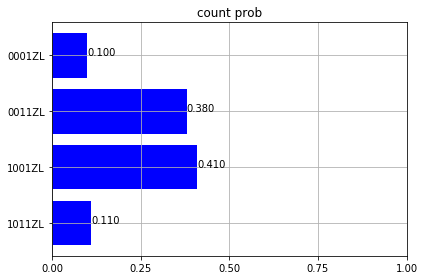

In [26]:
Plotter.plot_counts(counts)